<h1>HOUSING PRICE PREDICTION</h1>

<img src="https://miro.medium.com/max/402/1*2foyXif7hwkO8wWB5T9KtQ.png">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('House_project.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Start of EDA process</h2>

***Checking data types and null count of the columns***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#dropping id column as it doesn't hold any value
df.drop(['Id'],axis=1,inplace=True)

<h3>There are multiple missing values in many of the columns, treating them all separately as per need</h3>

In [5]:
#LotFrontage: Linear feet of street connected to property
#This column has few missing values, since it is a float value, we will be replacing missing values with avearge of that column
df['LotFrontage']=df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean())

In [6]:
#Alley: Type of alley access to property
#The missing values in this coulmn represent that there is No alley access, we are going to replace with the same.
df['Alley']=df['Alley'].replace(np.nan,'No alley access')

In [7]:
#MasVnrType: Masonry veneer type
#This column is of object type and only few values are missing, hence we are going to replace the missing values with the most common group which is None
df['MasVnrType']=df['MasVnrType'].replace(np.nan,'None')

In [8]:
#MasVnrArea: Masonry veneer area in square feet
#This column contains float value representing area, hence we are going to replace it by the average of that column
df['MasVnrArea']=df['MasVnrArea'].replace(np.nan,df['MasVnrArea'].mean())

In [9]:
#BsmtQual: Evaluates the height of the basement
#The missing values in this column represent no basement
df['BsmtQual']=df['BsmtQual'].replace(np.nan,'No Basement')

In [10]:
#BsmtCond: Evaluates the general condition of the basement
#The missing values in this column also represent no basement
df['BsmtCond']=df['BsmtCond'].replace(np.nan,'No Basement')

In [11]:
#BsmtExposure: Refers to walkout or garden level walls
#The missing values in this column also represent no basement
df['BsmtExposure']=df['BsmtExposure'].replace(np.nan,'No Basement')

In [12]:
#BsmtFinType1: Rating of basement finished area
#The missing values in this column also represent no basement
df['BsmtFinType1']=df['BsmtFinType1'].replace(np.nan,'No Basement')

In [13]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
#The missing values in this column also represent no basement
df['BsmtFinType2']=df['BsmtFinType2'].replace(np.nan,'No Basement')

In [14]:
#Electrical: Electrical system
#This column has one missing value, since SBrkr(Standard Circuit Breakers & Romex) is the most common group, we will replace it by the same
df['Electrical']=df['Electrical'].replace(np.nan,'SBrkr')

In [15]:
#FireplaceQu: Fireplace quality
#the missing values in this column represent No Fireplace
df['FireplaceQu']=df['FireplaceQu'].replace(np.nan,'No Fireplace')

In [16]:
#GarageType: Garage location
#the missing values in this column represent No Garage
df['GarageType']=df['GarageType'].replace(np.nan,'No Garage')

In [17]:
#GarageYrBlt: Year garage was built
#We will replace the missing value with year 2005m since it is the year where most garages were built
df['GarageYrBlt']=df['GarageYrBlt'].replace(np.nan,2005)

In [18]:
#GarageFinish: Interior finish of the garage
#the missing values in this column represent No Garage
df['GarageFinish']=df['GarageFinish'].replace(np.nan,'No Garage')

In [19]:
#GarageQual: Garage quality
#GarageCond: Garage condition
#the missing values in these columns represent No Garage
df['GarageQual']=df['GarageQual'].replace(np.nan,'No Garage')
df['GarageCond']=df['GarageCond'].replace(np.nan,'No Garage')

In [20]:
#PoolQC: Pool quality
#the missing values in this column represents No Pool
df['PoolQC']=df['PoolQC'].replace(np.nan,'No Pool')

In [21]:
#Fence: Fence quality
#the missing values in this column represents No Fence
df['Fence']=df['Fence'].replace(np.nan,'No Fence')

In [22]:
#MiscFeature: Miscellaneous feature not covered in other categories
#the missing values in this column represent that there is no Miscellaneous feature, hence we will replace it by none
df['MiscFeature']=df['MiscFeature'].replace(np.nan,'None')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<h3>We have treated all the missing values appropriately</h3>

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


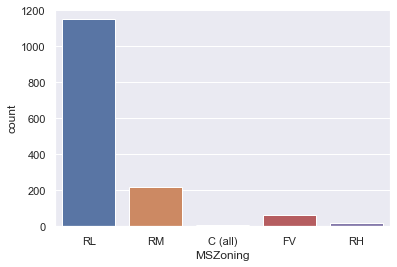

Pave    1454
Grvl       6
Name: Street, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


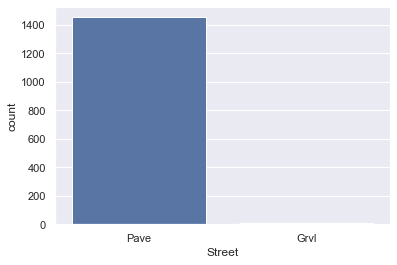

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


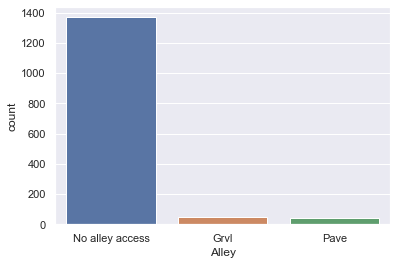

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


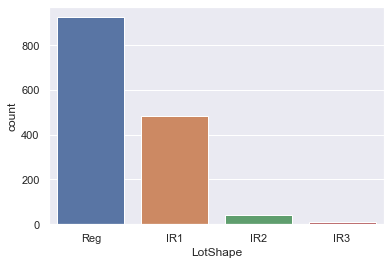

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


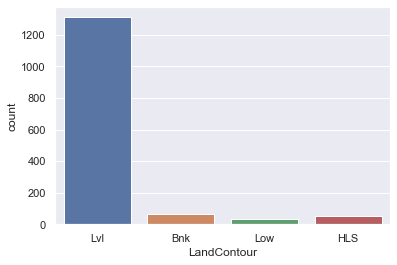

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


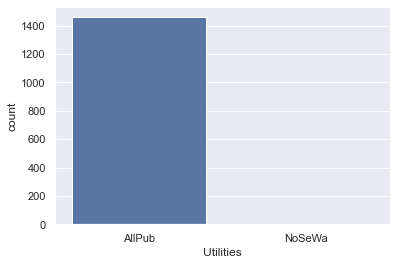

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


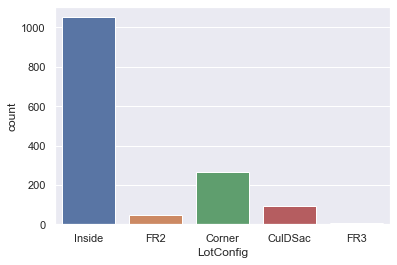

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


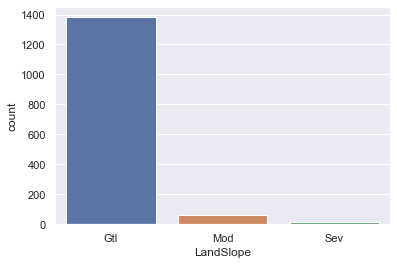

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


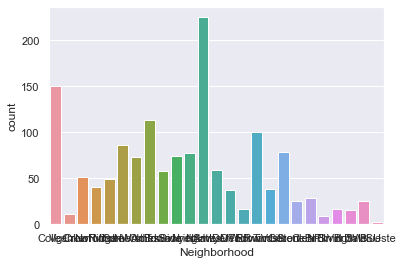

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


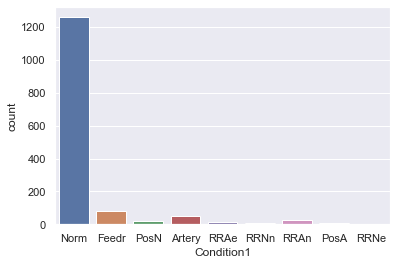

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


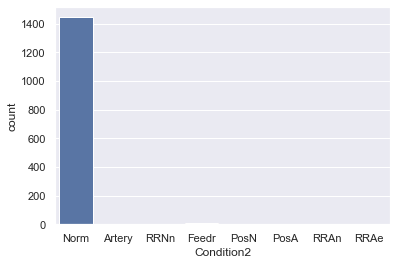

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


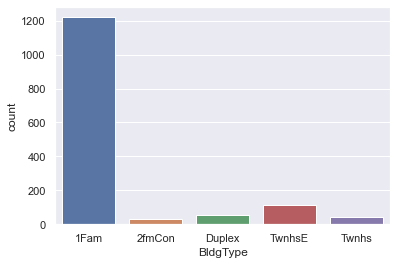

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


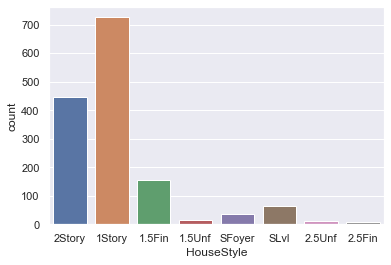

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


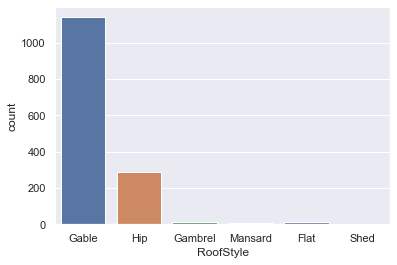

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


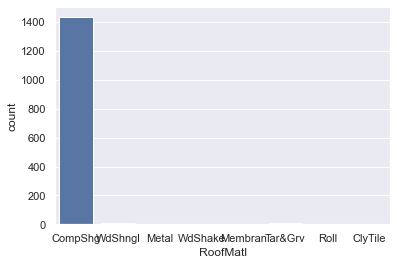

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


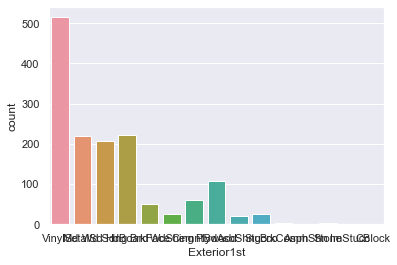

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


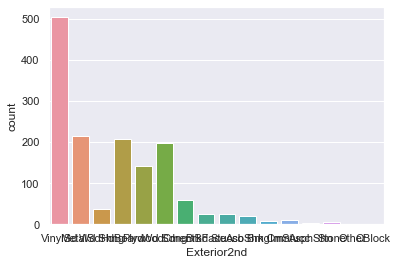

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


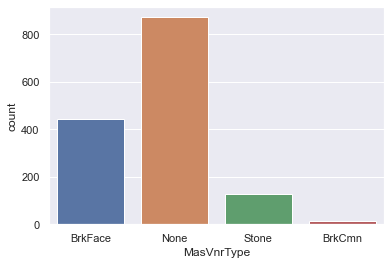

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


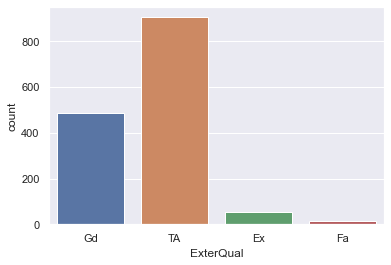

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


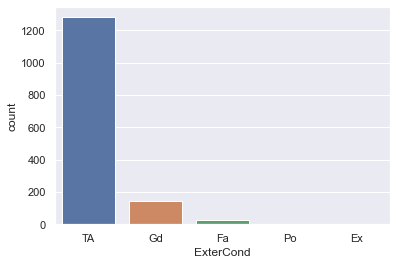

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


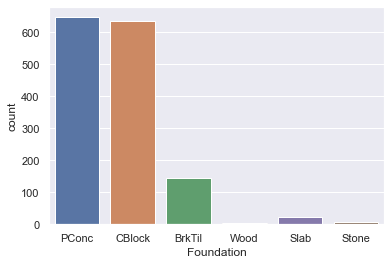

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


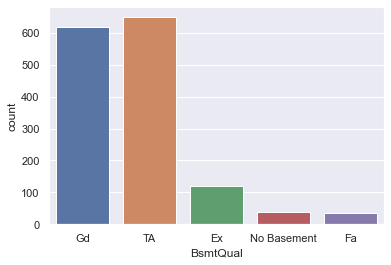

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


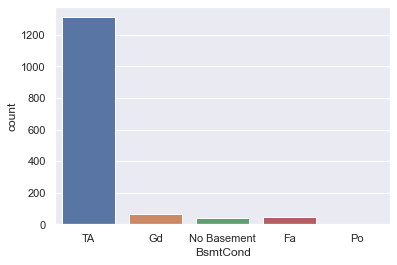

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


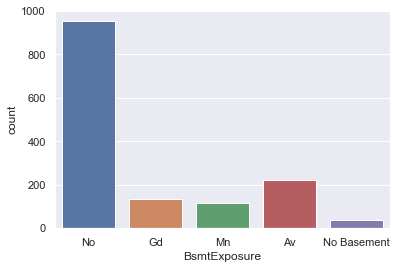

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


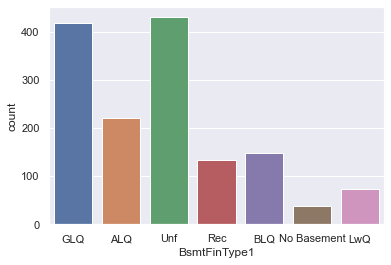

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


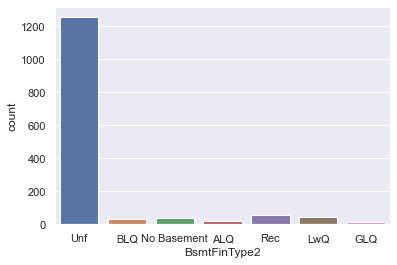

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


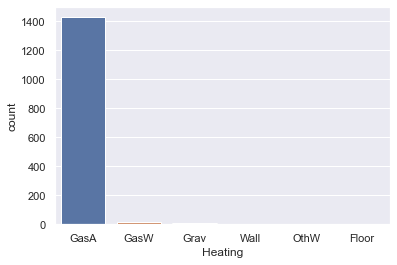

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


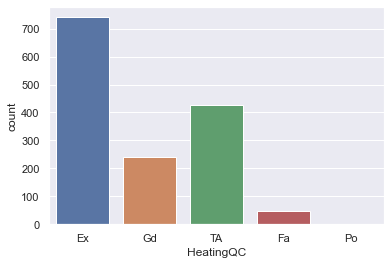

Y    1365
N      95
Name: CentralAir, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


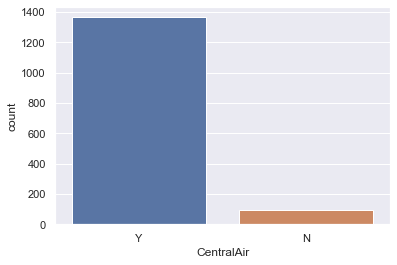

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


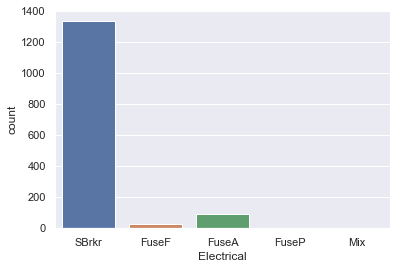

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


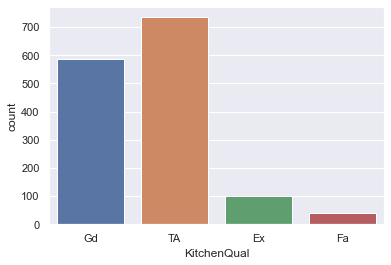

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


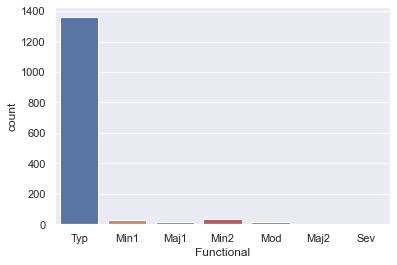

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


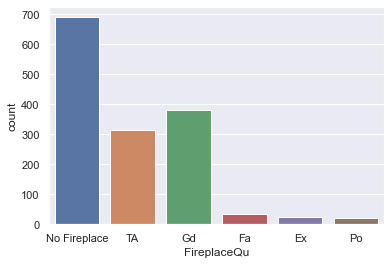

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


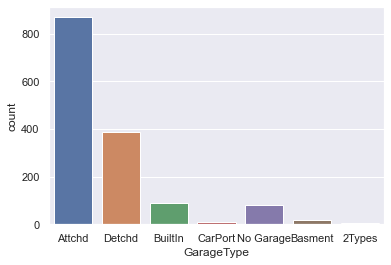

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


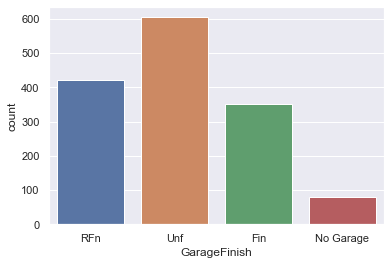

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


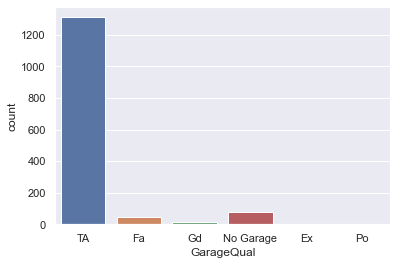

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


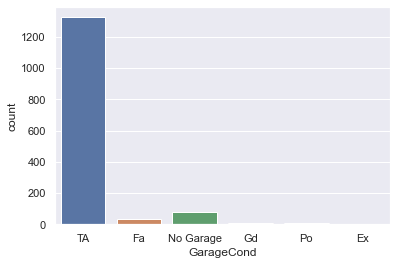

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


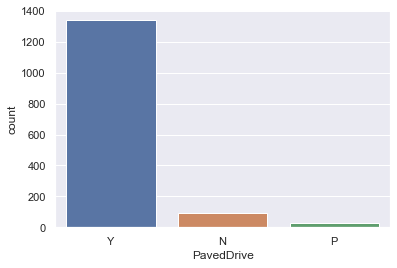

No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


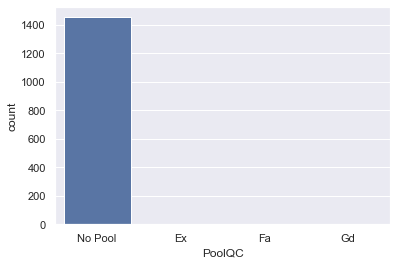

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


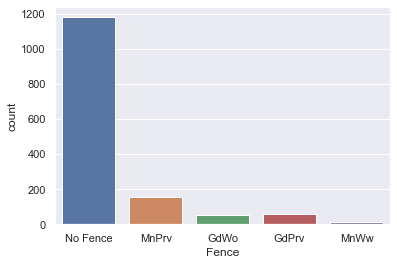

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


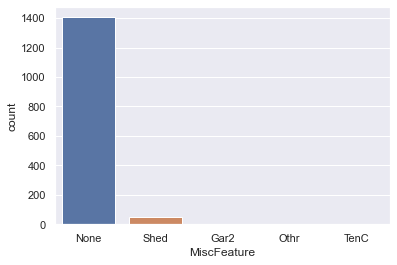

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


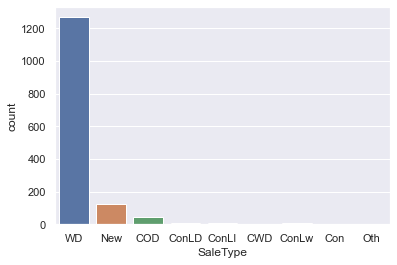

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


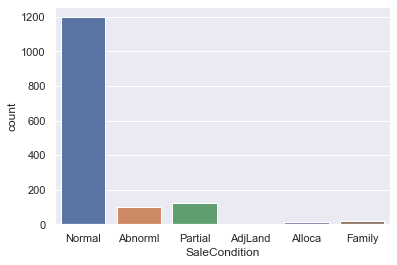

In [24]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())
        print()
        print(sns.countplot(df[i]))
        plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


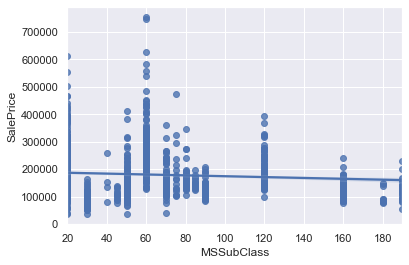

AxesSubplot(0.125,0.125;0.775x0.755)


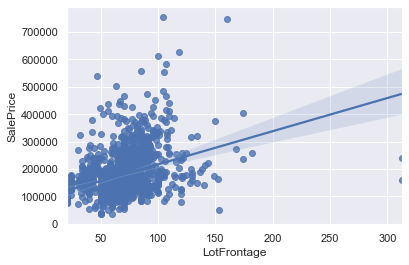

AxesSubplot(0.125,0.125;0.775x0.755)


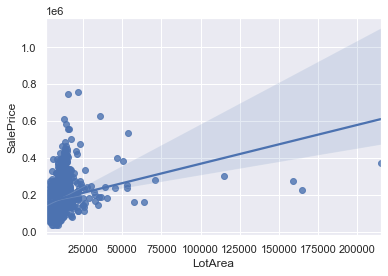

AxesSubplot(0.125,0.125;0.775x0.755)


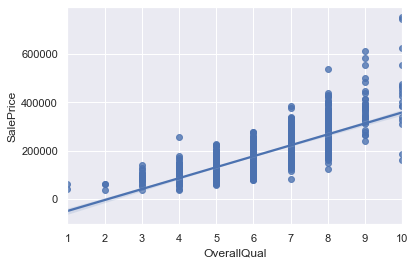

AxesSubplot(0.125,0.125;0.775x0.755)


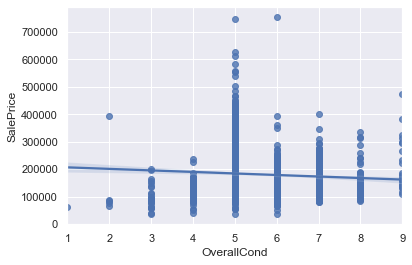

AxesSubplot(0.125,0.125;0.775x0.755)


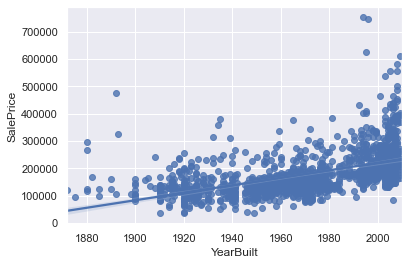

AxesSubplot(0.125,0.125;0.775x0.755)


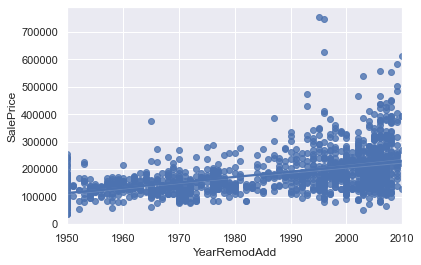

AxesSubplot(0.125,0.125;0.775x0.755)


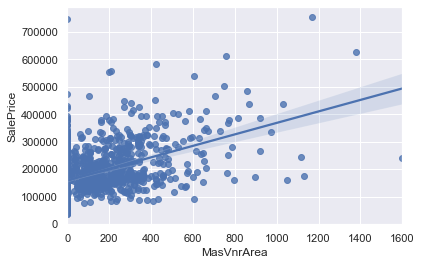

AxesSubplot(0.125,0.125;0.775x0.755)


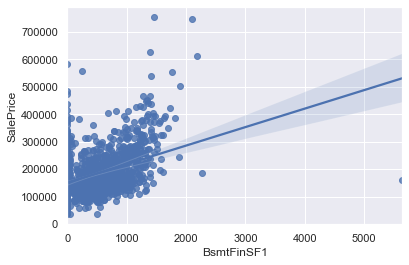

AxesSubplot(0.125,0.125;0.775x0.755)


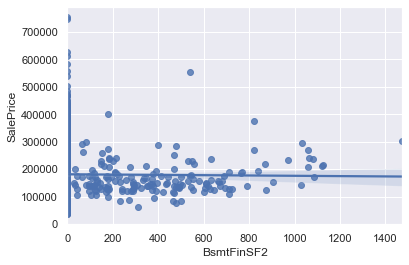

AxesSubplot(0.125,0.125;0.775x0.755)


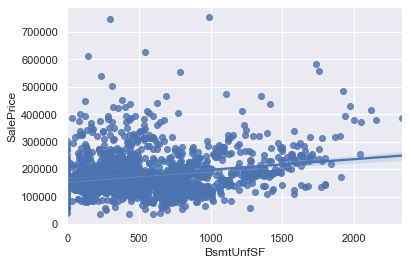

AxesSubplot(0.125,0.125;0.775x0.755)


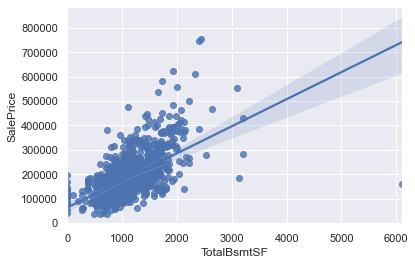

AxesSubplot(0.125,0.125;0.775x0.755)


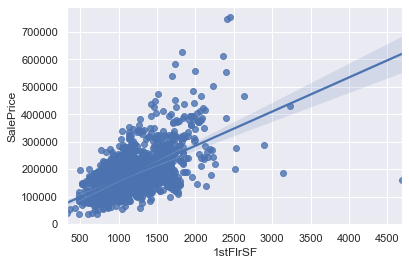

AxesSubplot(0.125,0.125;0.775x0.755)


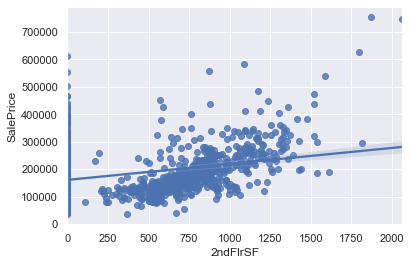

AxesSubplot(0.125,0.125;0.775x0.755)


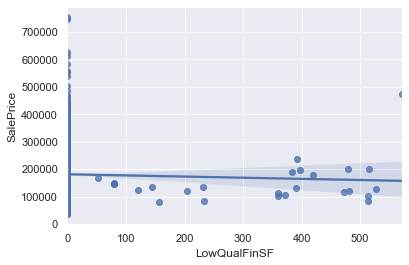

AxesSubplot(0.125,0.125;0.775x0.755)


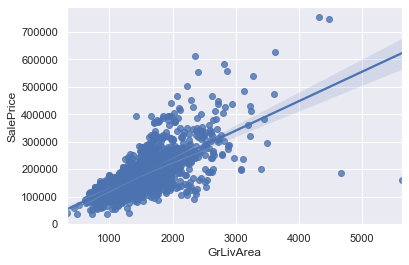

AxesSubplot(0.125,0.125;0.775x0.755)


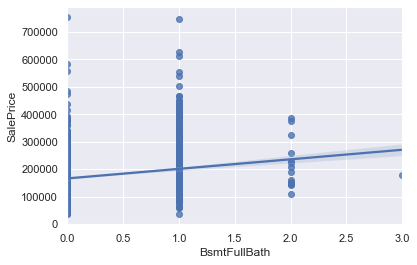

AxesSubplot(0.125,0.125;0.775x0.755)


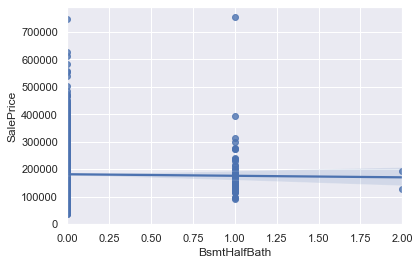

AxesSubplot(0.125,0.125;0.775x0.755)


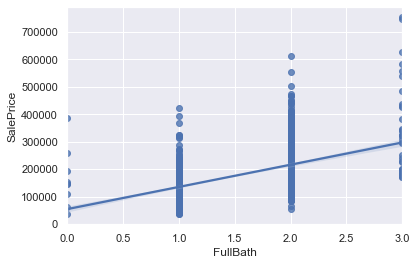

AxesSubplot(0.125,0.125;0.775x0.755)


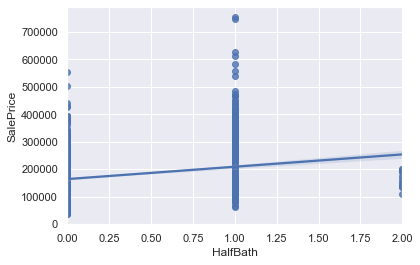

AxesSubplot(0.125,0.125;0.775x0.755)


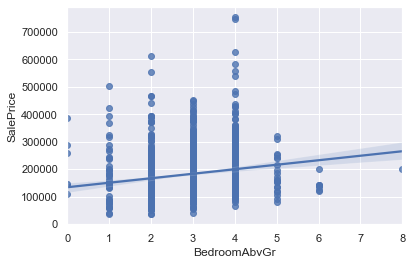

AxesSubplot(0.125,0.125;0.775x0.755)


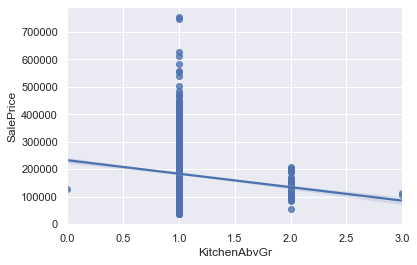

AxesSubplot(0.125,0.125;0.775x0.755)


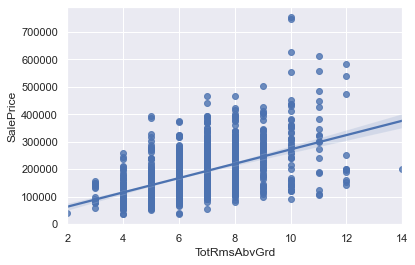

AxesSubplot(0.125,0.125;0.775x0.755)


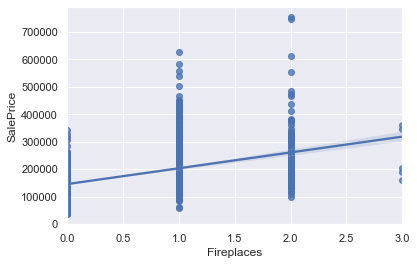

AxesSubplot(0.125,0.125;0.775x0.755)


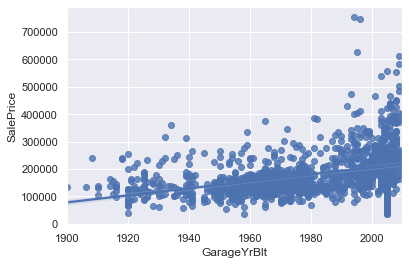

AxesSubplot(0.125,0.125;0.775x0.755)


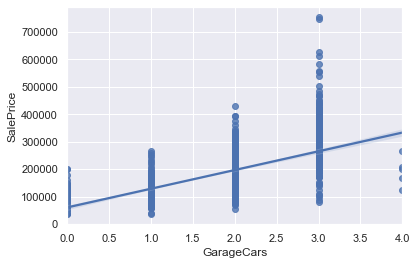

AxesSubplot(0.125,0.125;0.775x0.755)


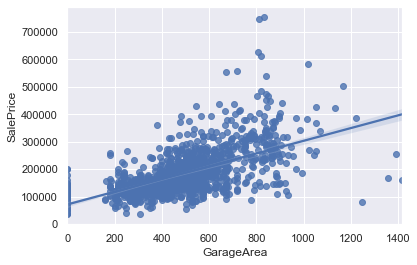

AxesSubplot(0.125,0.125;0.775x0.755)


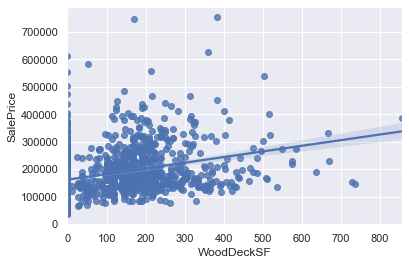

AxesSubplot(0.125,0.125;0.775x0.755)


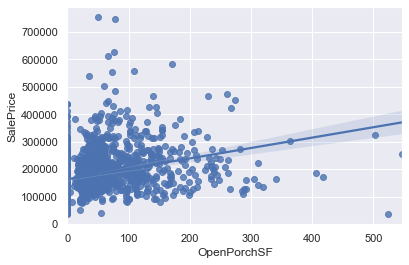

AxesSubplot(0.125,0.125;0.775x0.755)


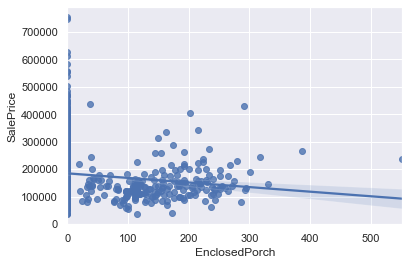

AxesSubplot(0.125,0.125;0.775x0.755)


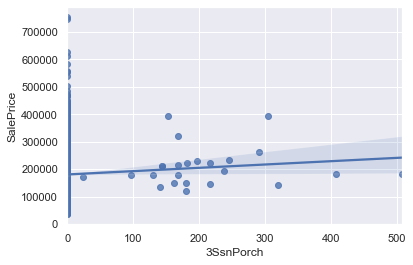

AxesSubplot(0.125,0.125;0.775x0.755)


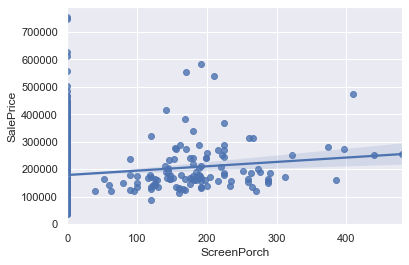

AxesSubplot(0.125,0.125;0.775x0.755)


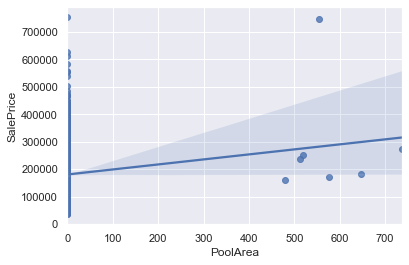

AxesSubplot(0.125,0.125;0.775x0.755)


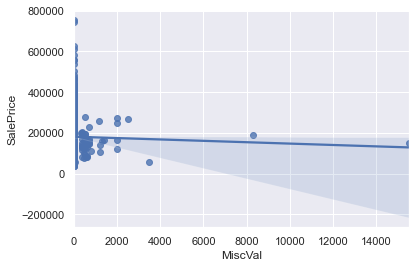

AxesSubplot(0.125,0.125;0.775x0.755)


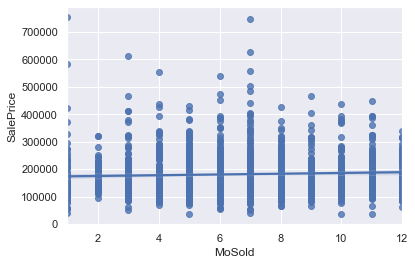

AxesSubplot(0.125,0.125;0.775x0.755)


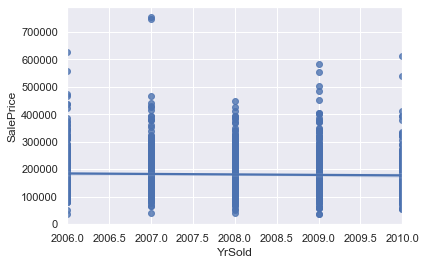

AxesSubplot(0.125,0.125;0.775x0.755)


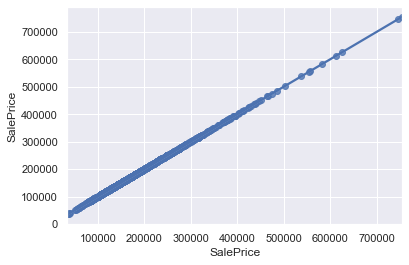

In [25]:
 for i in df.columns:
                if df[i].dtype!='object':
                     print(sns.regplot(x=df[i],y="SalePrice",data=df))
                     plt.show()

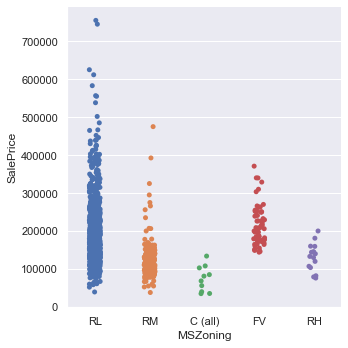

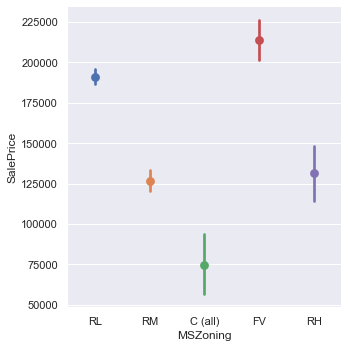

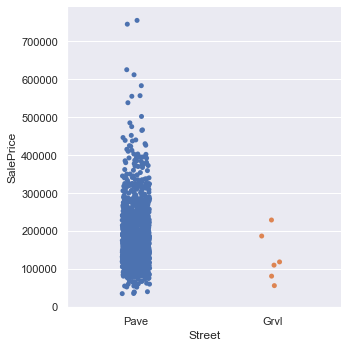

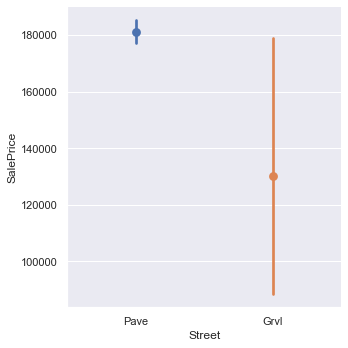

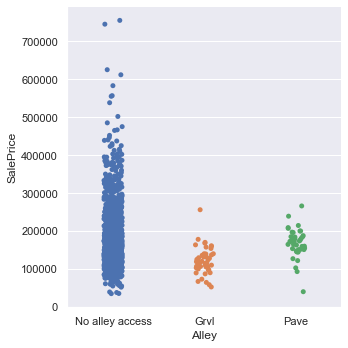

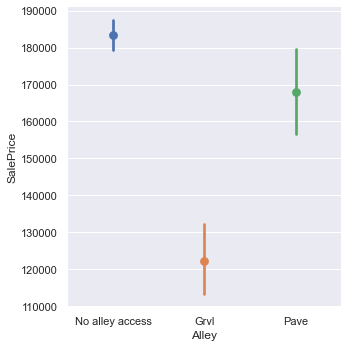

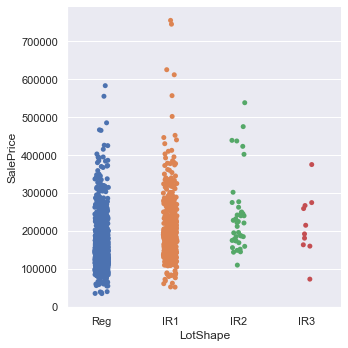

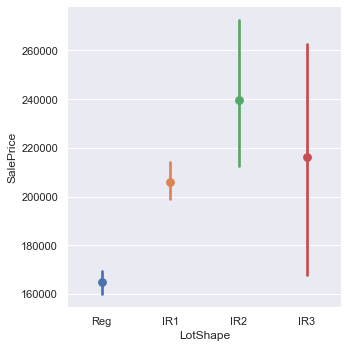

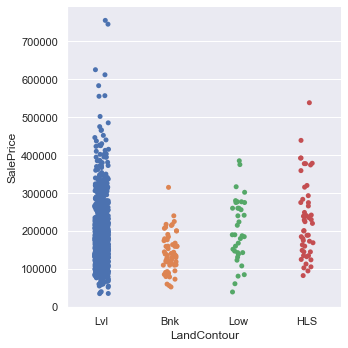

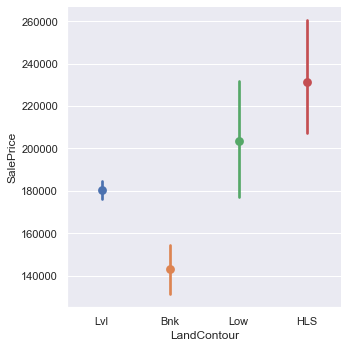

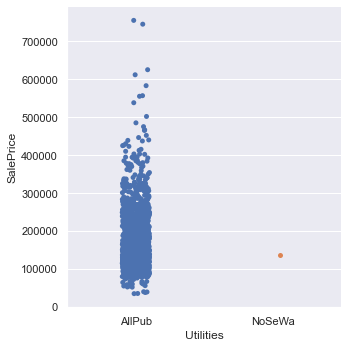

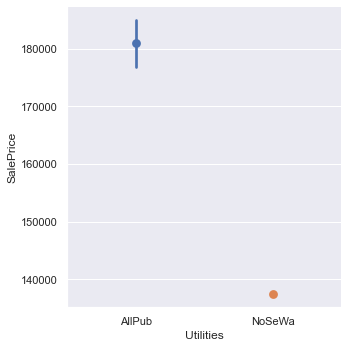

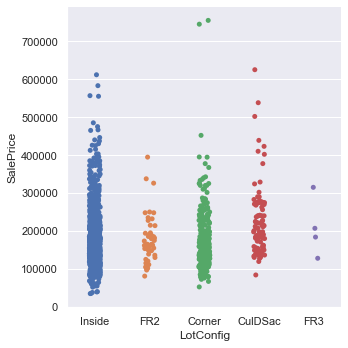

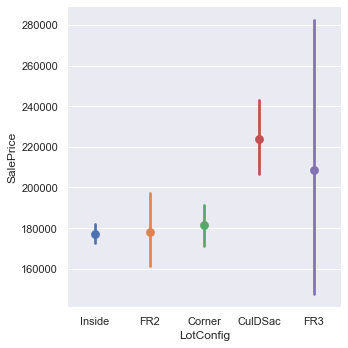

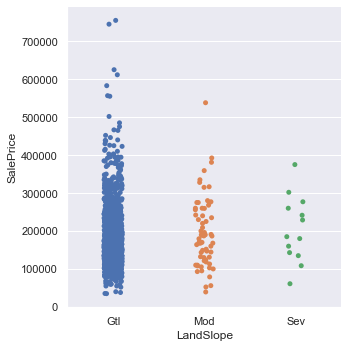

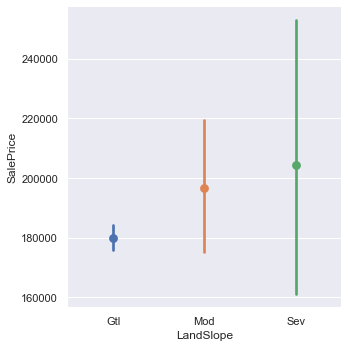

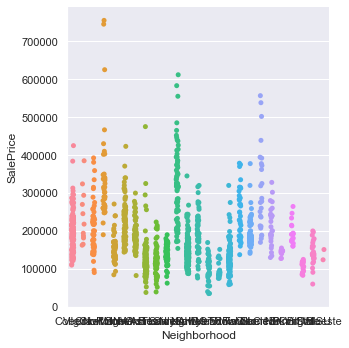

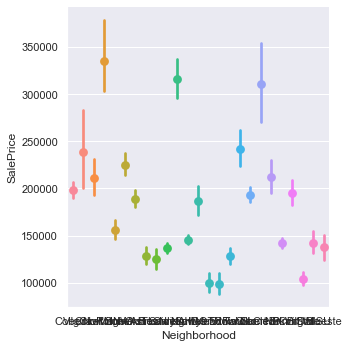

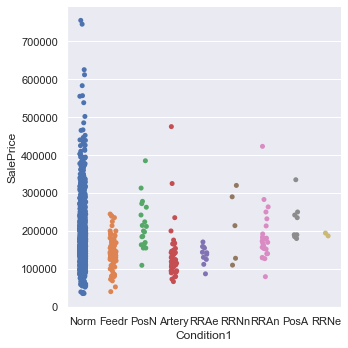

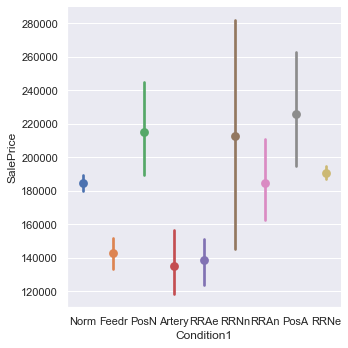

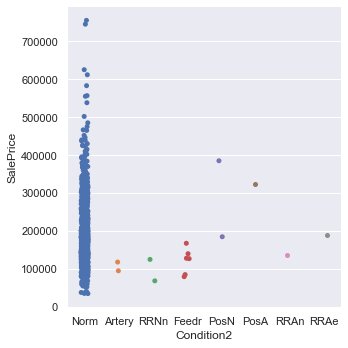

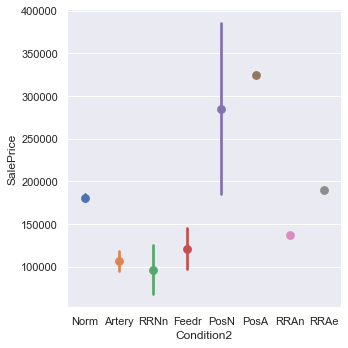

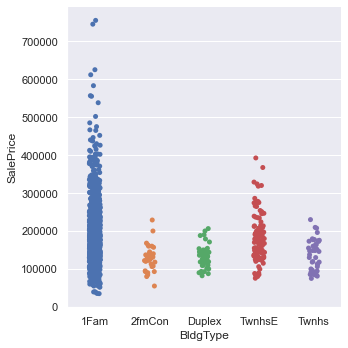

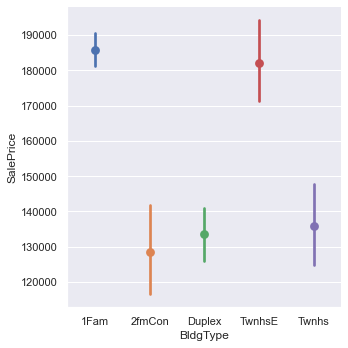

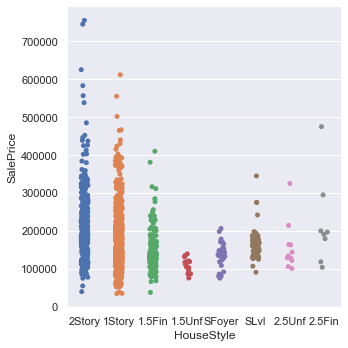

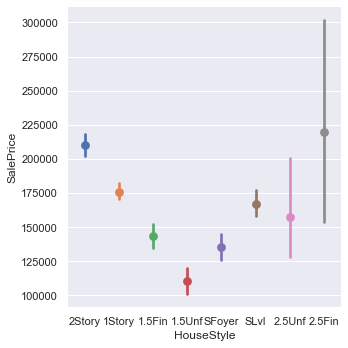

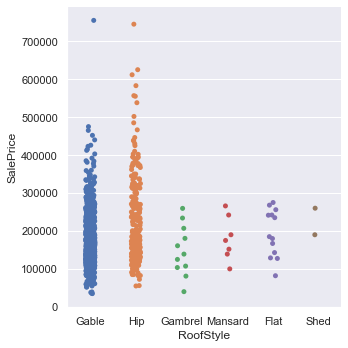

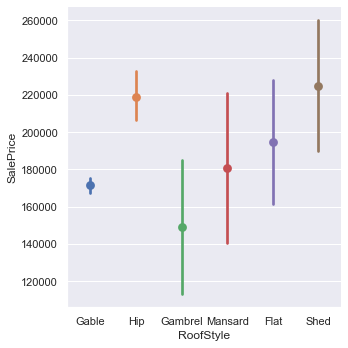

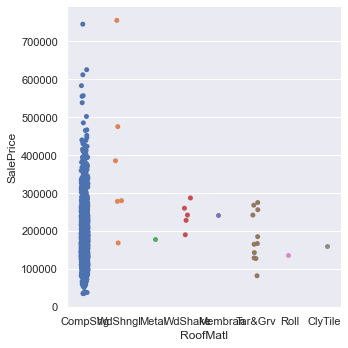

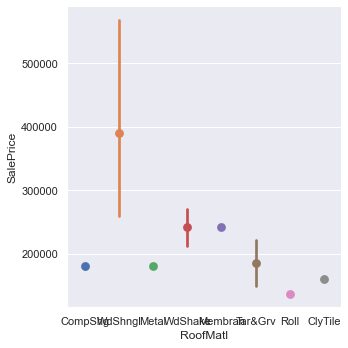

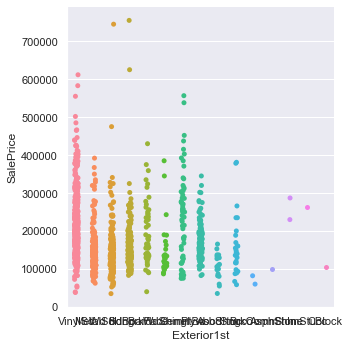

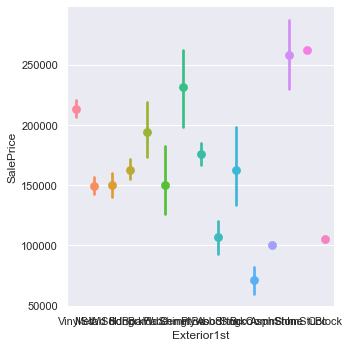

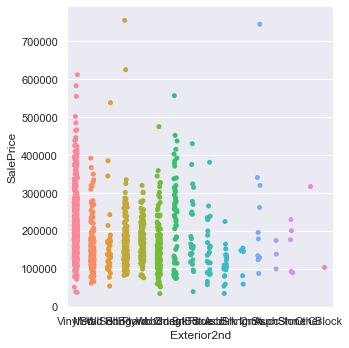

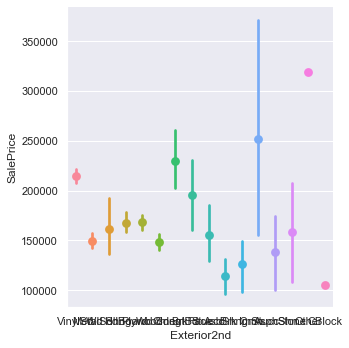

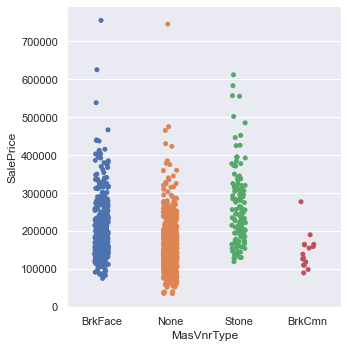

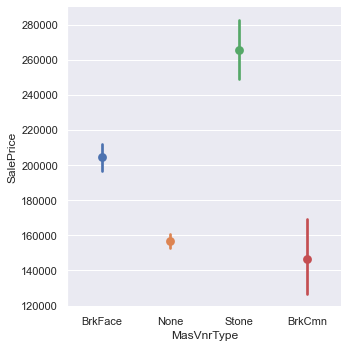

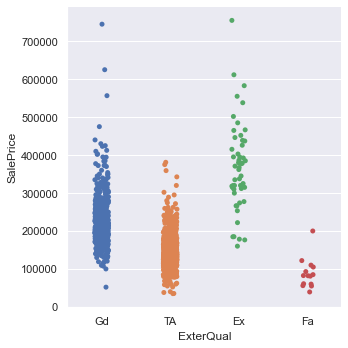

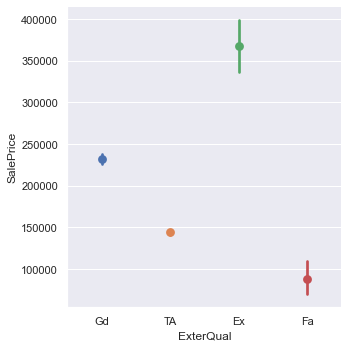

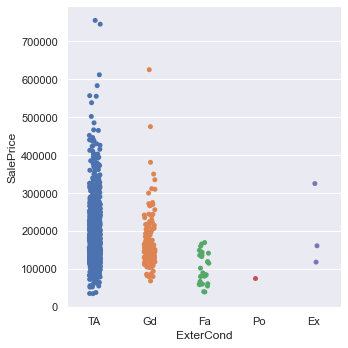

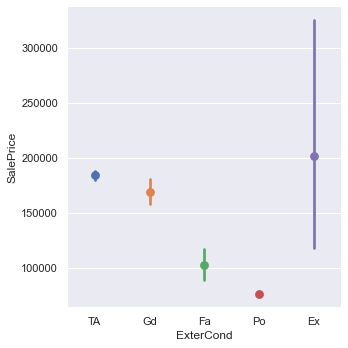

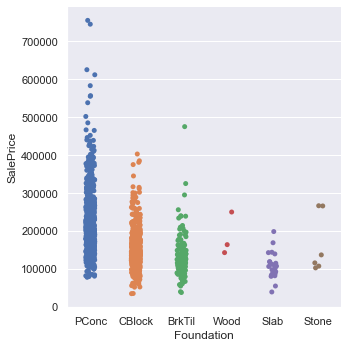

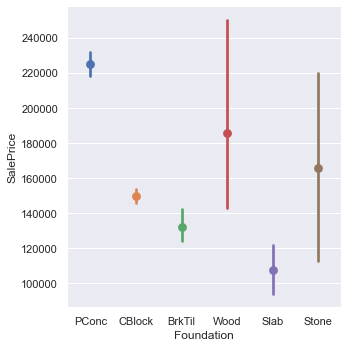

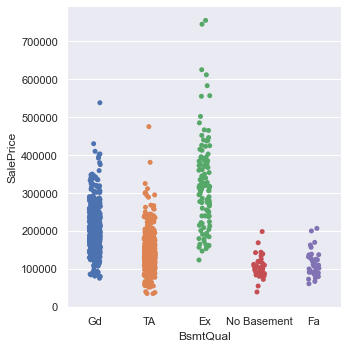

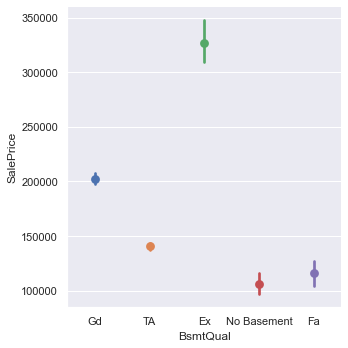

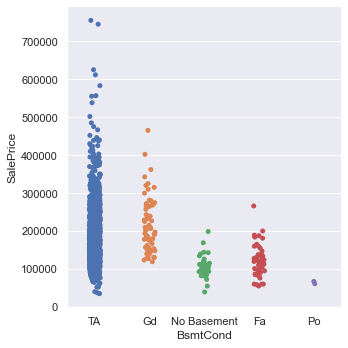

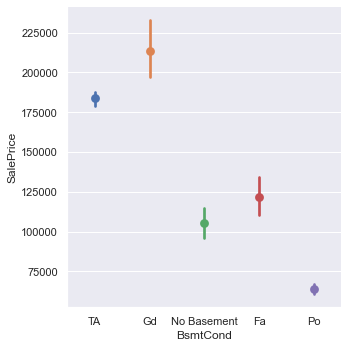

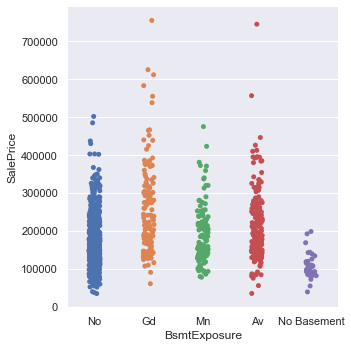

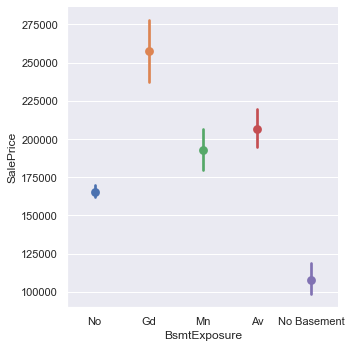

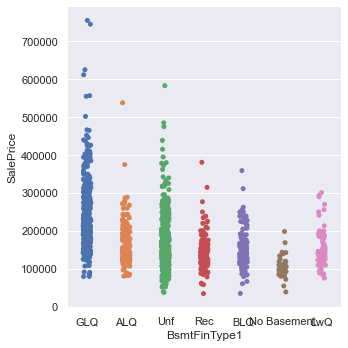

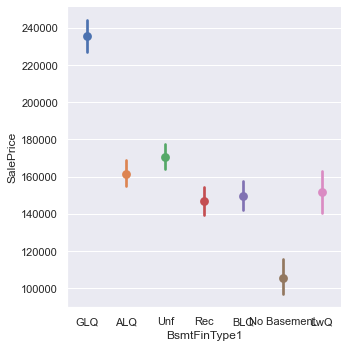

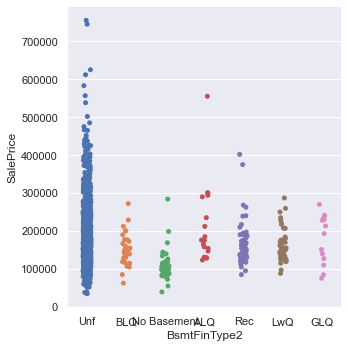

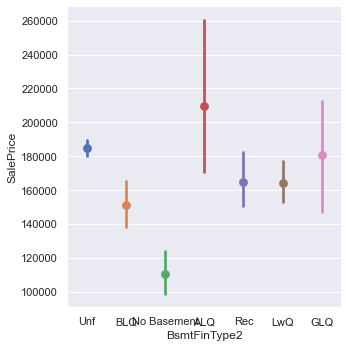

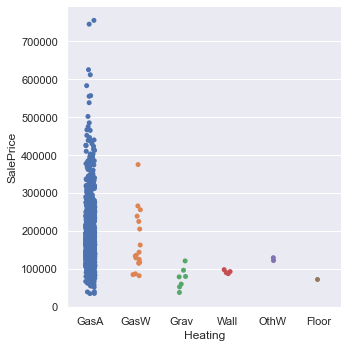

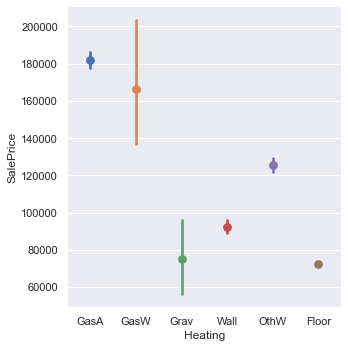

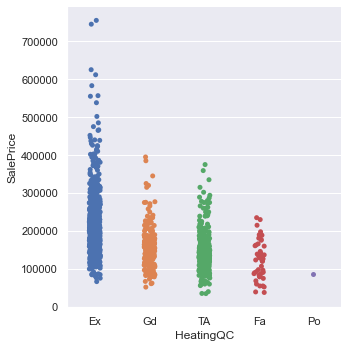

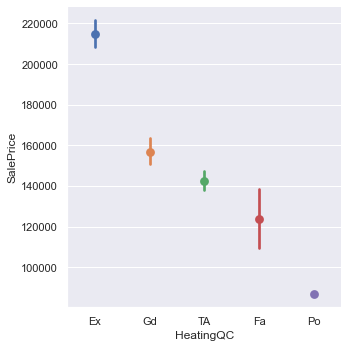

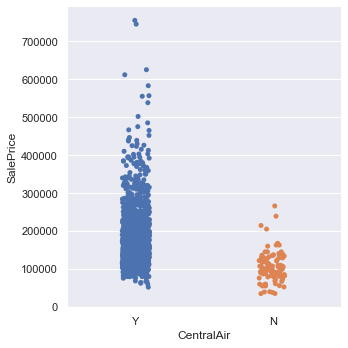

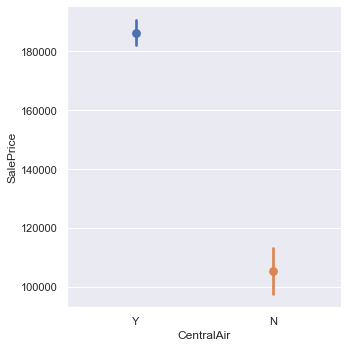

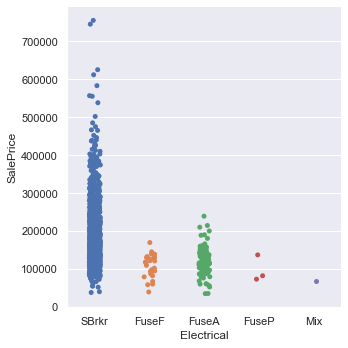

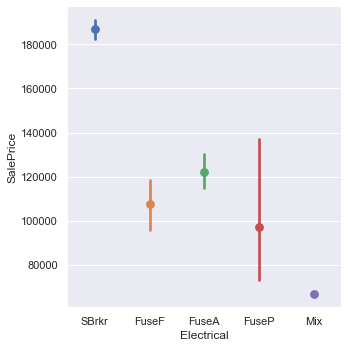

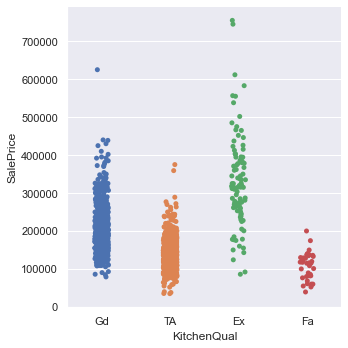

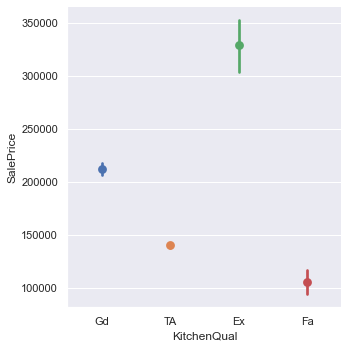

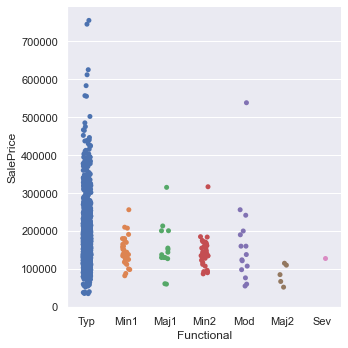

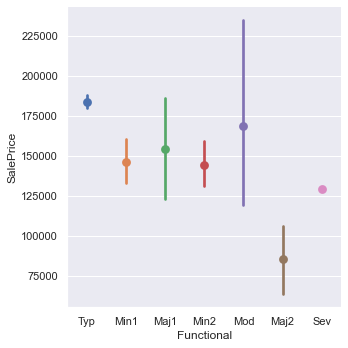

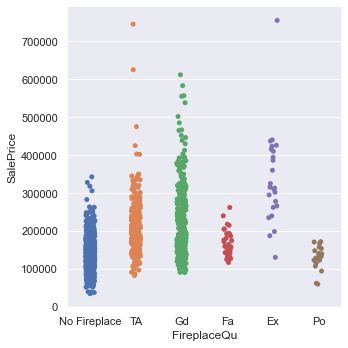

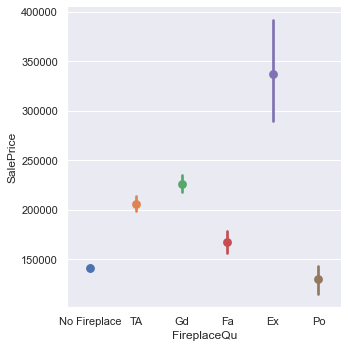

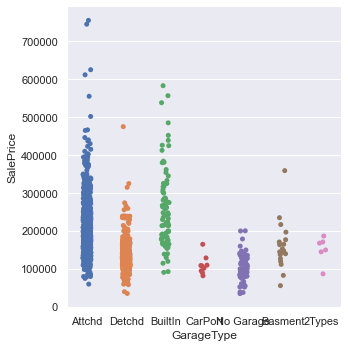

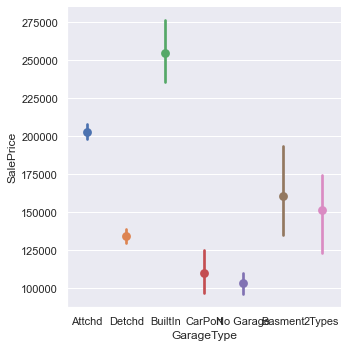

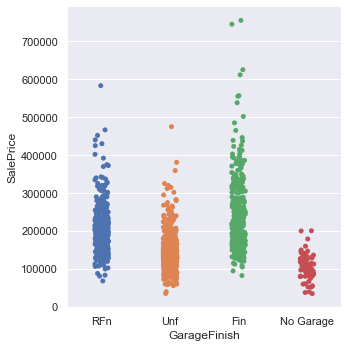

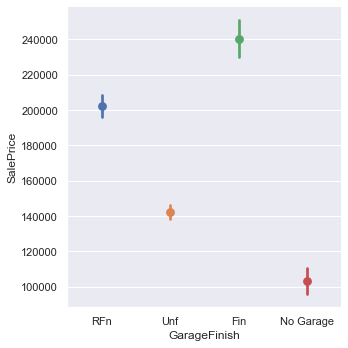

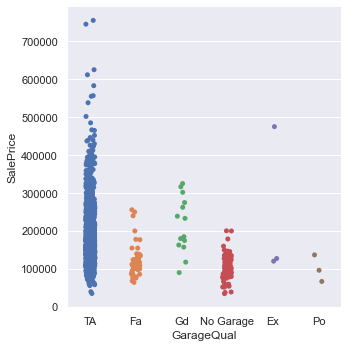

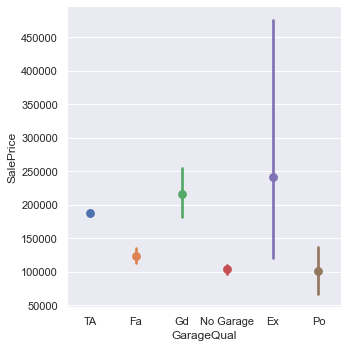

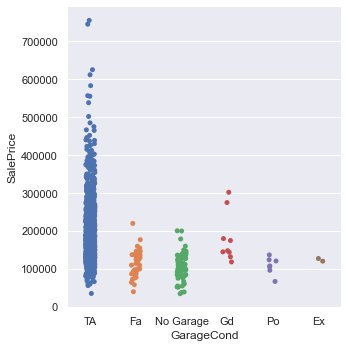

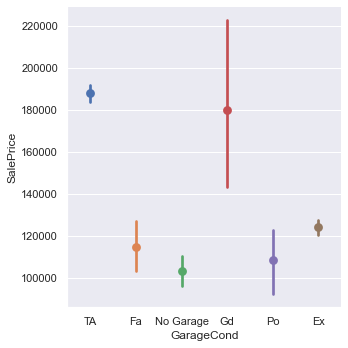

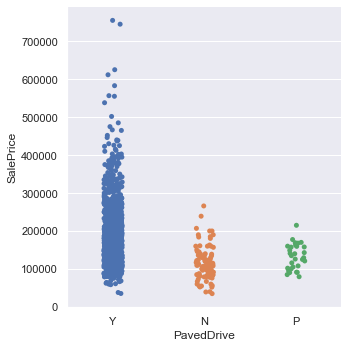

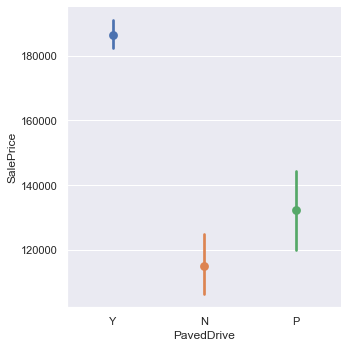

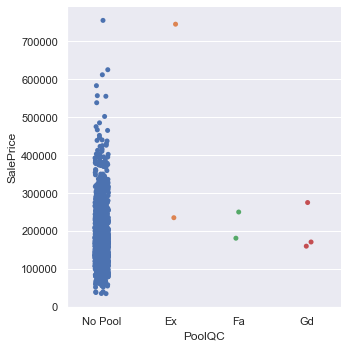

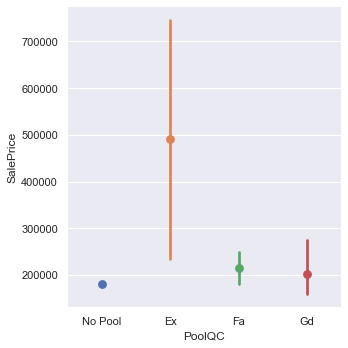

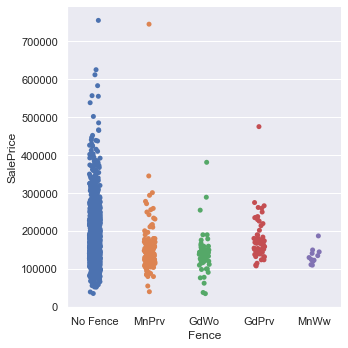

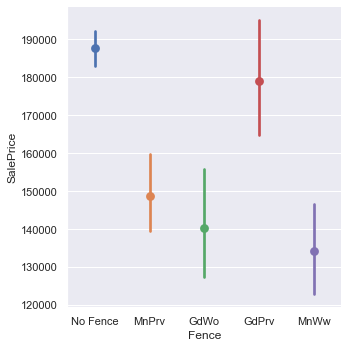

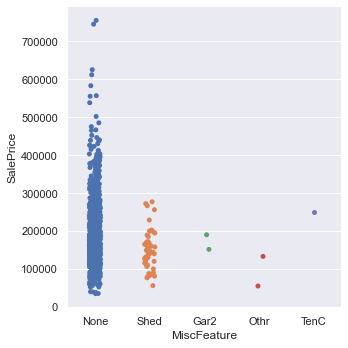

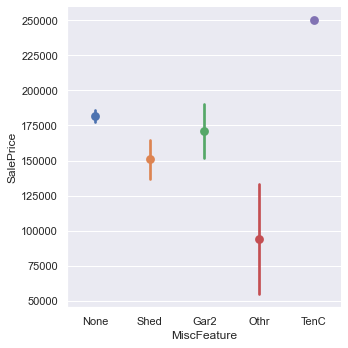

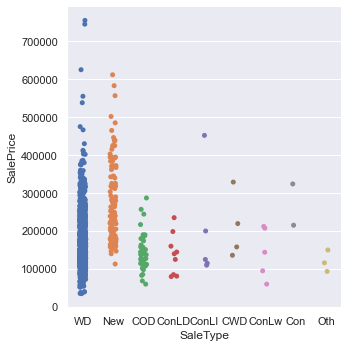

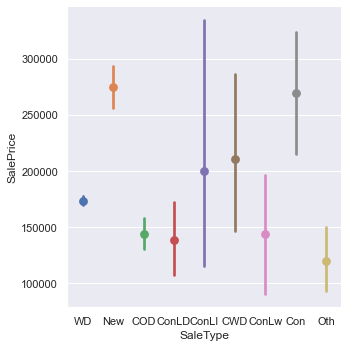

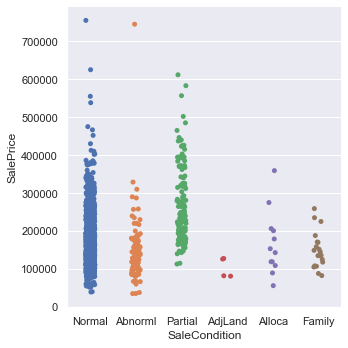

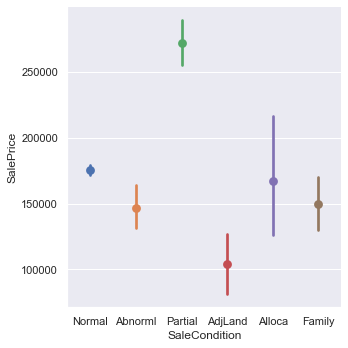

In [26]:
for i in df.columns:
        if df[i].dtype=='object':
            sns.catplot(x=i, y="SalePrice", data=df)   
            sns.catplot(x=i, y="SalePrice", hue=i,kind="point", data=df)
            plt.show()

***Converting categorical variables to numerical using label encoder***

In [27]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = labelencoder.fit_transform(df[i])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [28]:
y=df[['SalePrice']]
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [29]:
x=df.drop(['SalePrice'],axis=1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4


We have both of input and output attributes cleaned and in desired format


Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

***Lets import required packages***

In [30]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [32]:
LA=Lasso()
LR=LinearRegression()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [33]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [34]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x,y,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* LinearRegression *------------------------------*
LinearRegression()
R2_score =  81.95548111246868
Mean_Squared_Error = 1174189657.6973567
Cross_Val_Score =  79.89586754913881


*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  81.97114153930129
Mean_Squared_Error = 1173170605.2451084
Cross_Val_Score =  79.90968926822556


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  83.50417930703162
Mean_Squared_Error = 1073413049.8928156
Cross_Val_Score =  80.6405966216967


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  86.59743265303246
Mean_Squared_Error = 872129429.6339418
Cross_Val_Score =  81.733217841939


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  78.83679201669264
Mean_Squared_Error = 1377128428.44863
Cross_Val_Score =  73.93305

In [35]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,LinearRegression,81.955481,1.174190e+09,79.895868
1,Lasso,81.971142,1.173171e+09,79.909689
2,Ridge,83.504179,1.073413e+09,80.640597
3,ElasticNet,86.597433,8.721294e+08,81.733218
4,DecisionTreeRegressor,78.836792,1.377128e+09,73.933057
5,KNeighborsRegressor,71.535626,1.852229e+09,66.391391
6,AdaBoostRegressor,85.065013,9.718468e+08,80.914378
7,RandomForestRegressor,89.582772,6.778680e+08,87.047843
8,GradientBoostingRegressor,90.846608,5.956279e+08,89.189360


**We are going to choose GradientBoostingRegressor as our final model as it is giving highest R2 score with good cross validation score**

<h3>End of Machine learning Process</h3>


<h2>Now lets save our final model</h2>

In [40]:
import joblib
joblib.dump(GBR,'House_price.pkl')

['House_price.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">